<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [0]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [0]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

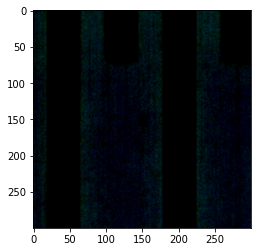

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [0]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [0]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
51.588867
54.204872
3.7526357 3.7526357
-0.95173854 -0.95173854


In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.


[0. 1.]


In [0]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [0]:
import keras
from keras import models
from keras import layers
from keras.applications.nasnet import NASNetLarge
#from keras.applications.resnet_v2 import ResNet152V2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras import backend as K

# create the base pre-trained model
input_tensor = Input(shape=(300, 300, 3))
base_model = NASNetLarge(input_tensor=input_tensor,weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False

model.summary()
















343613440/343610240 [==============================] - 4s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 149, 149, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 149, 149, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 96) 0           stem_bn1[0][0]                   
___________

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [0]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=20,epochs=10, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1430 samples, validate on 358 samples
Epoch 1/10
1430/1430 [==============================] - 3717s 3s/step - loss: 0.2120 - acc: 0.9371 - val_loss: 0.2119 - val_acc: 0.9385
Epoch 2/10
1430/1430 [==============================] - 3675s 3s/step - loss: 0.1441 - acc: 0.9469 - val_loss: 0.2039 - val_acc: 0.9385
Epoch 3/10
1430/1430 [==============================] - 3694s 3s/step - loss: 0.1136 - acc: 0.9490 - val_loss: 0.1955 - val_acc: 0.9441
Epoch 4/10
1300/1430 [==========================>...] - ETA: 5:06 - loss: 0.0864 - acc: 0.9623

KeyboardInterrupt: ignored

In [0]:
model.evaluate(xtest,ytest)

881/881 [==============================] - 723s 820ms/step


[0.17466865605109125, 0.944381384857667]

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.08      0.14        51
     class 1       0.95      1.00      0.97       830

    accuracy                           0.94       881
   macro avg       0.81      0.54      0.56       881
weighted avg       0.93      0.94      0.92       881



In [0]:
model.evaluate(xtrain,ytrain)

1788/1788 [==============================] - 1472s 823ms/step


[0.0848173760211041, 0.968680089752146]

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.45      0.61        98
     class 1       0.97      1.00      0.98      1690

    accuracy                           0.97      1788
   macro avg       0.96      0.72      0.80      1788
weighted avg       0.97      0.97      0.96      1788

